# **Iris Flower Classification**
*John Manley*  
5/26/2025

In [710]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris

iris = load_iris() # iris dataset

In [712]:
# exploring the data set columns
print(f'Column names: {iris.keys()}\n') # column names
#print(iris['DESCR']) # description of the datsaset

print(f"Iris types: {iris.target_names}\n")
print(f"Iris attributes: {iris.feature_names}\n")

print('First five Iris:')
for i in range(5):
    print(f"data: {iris.data[i]},  type: {iris.target_names[iris.target[i]]}")

Column names: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Iris types: ['setosa' 'versicolor' 'virginica']

Iris attributes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First five Iris:
data: [5.1 3.5 1.4 0.2],  type: setosa
data: [4.9 3.  1.4 0.2],  type: setosa
data: [4.7 3.2 1.3 0.2],  type: setosa
data: [4.6 3.1 1.5 0.2],  type: setosa
data: [5.  3.6 1.4 0.2],  type: setosa


In [182]:
# converting to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Exploring Data Analysis (EDA)

In [715]:
# helper function for scatter plotting
def scatter(ax, row, col, x_name, y_name):
    x = df[x_name]
    y = df[y_name]
    
    for i in range(3):
        ax[row, col].scatter(x[50*i:50*i+50], y[50*i:50*i+50],
           color=['blue', 'red', 'green'][i],
           alpha=0.7,          
           edgecolor='black',
           s=40,                 
           marker='o',           
           label=df['species'][50*i])

    ax[row, col].set_title(f"Iris {y_name} vs {x_name}")
    ax[row, col].set_xlabel(x_name)
    ax[row, col].set_ylabel(y_name)
    ax[row, col].legend()

## Scatter Plotting All Feature Pairs

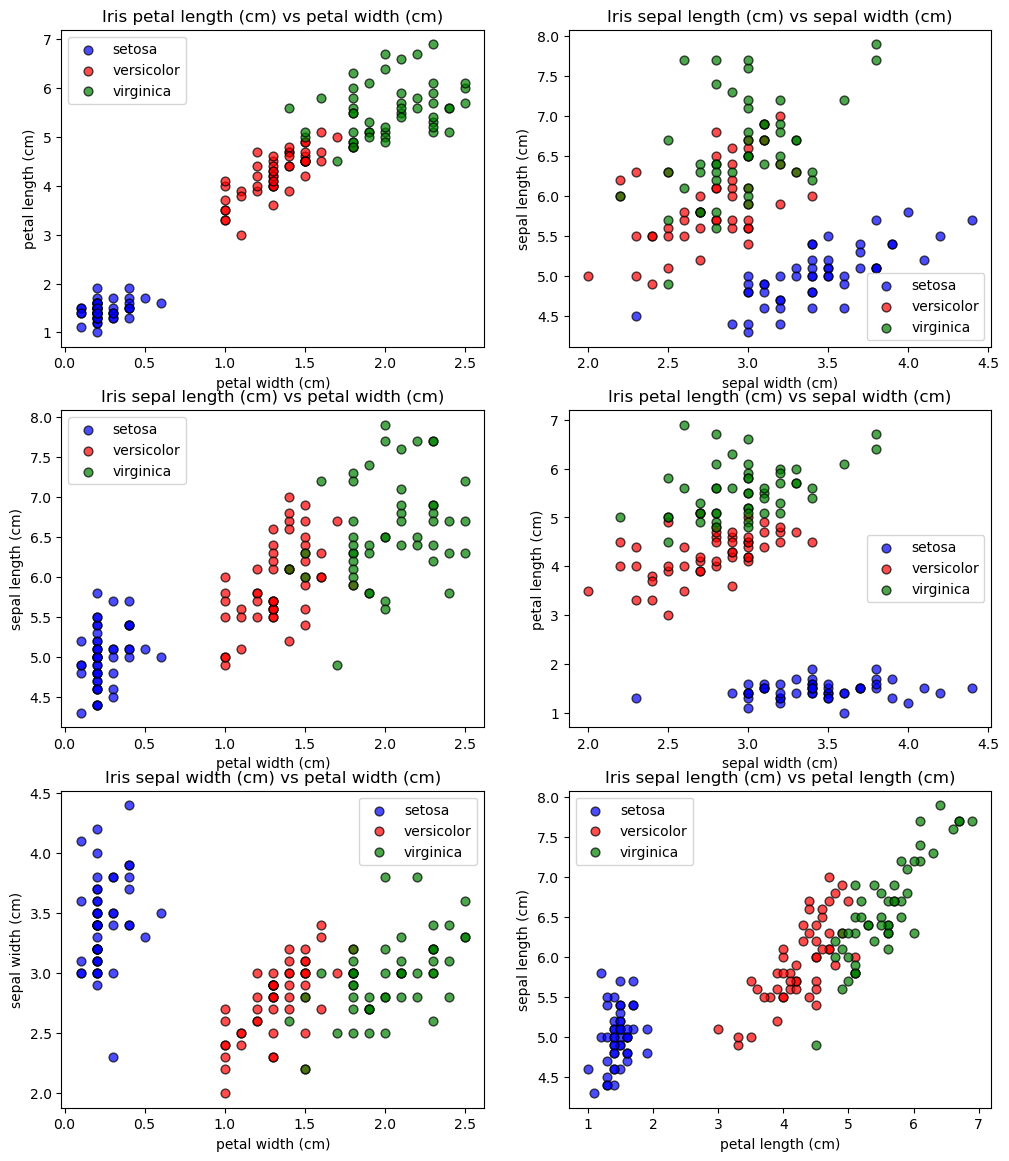

In [206]:
fig, ax = plt.subplots(3, 2, figsize=(12, 14))

scatter(ax, 0, 0, 'petal width (cm)', 'petal length (cm)')
scatter(ax, 0, 1, 'sepal width (cm)', 'sepal length (cm)')

scatter(ax, 1, 0, 'petal width (cm)', 'sepal length (cm)')
scatter(ax, 1, 1, 'sepal width (cm)', 'petal length (cm)')

scatter(ax, 2, 0, 'petal width (cm)', 'sepal width (cm)')
scatter(ax, 2, 1, 'petal length (cm)', 'sepal length (cm)')
plt.show()

## Box Plots for Each Feature

In [274]:
def box(ax, row, col, x_name):
    x = df[x_name]
    x = [x[0:50], x[50:100], x[100:150]]
    ax[row, col].boxplot(x,
           vert=True,                 # Horizontal if False
           patch_artist=True,         # Fill color
           medianprops=dict(color='blue', linewidth=2),
           showmeans=False,           # Add mean marker
           boxprops=dict(facecolor='lightblue'),
           flierprops=dict(marker='s', color='black', alpha=0.5))
    ax[row, col].set_title(f"Box Plot of {x_name}")
    ax[row, col].set_xlabel("Species")
    ax[row, col].set_ylabel(x_name)
    ax[row, col].set_xticklabels(iris.target_names)

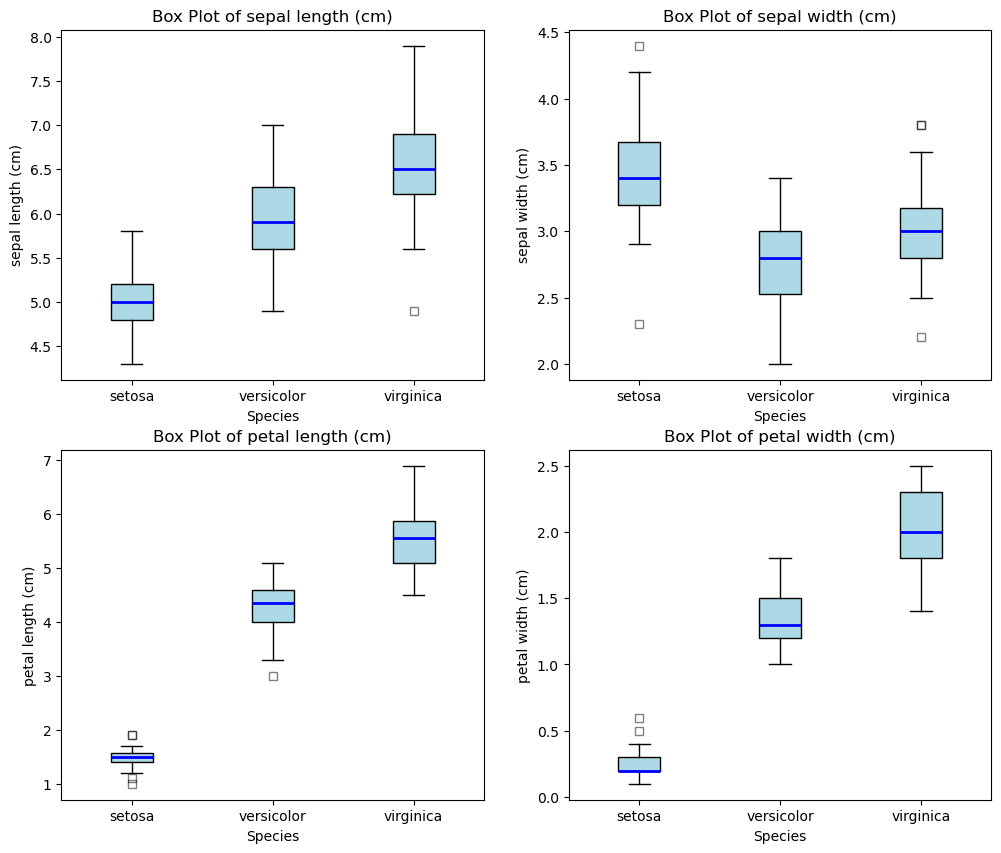

In [276]:
fig1, ax1 = plt.subplots(2, 2, figsize=(12, 10))

box(ax1, 0, 0, 'sepal length (cm)')
box(ax1, 0, 1, 'sepal width (cm)')

box(ax1, 1, 0, 'petal length (cm)')
box(ax1, 1, 1, 'petal width (cm)')

plt.show()

## Graphing Correlation Matrix

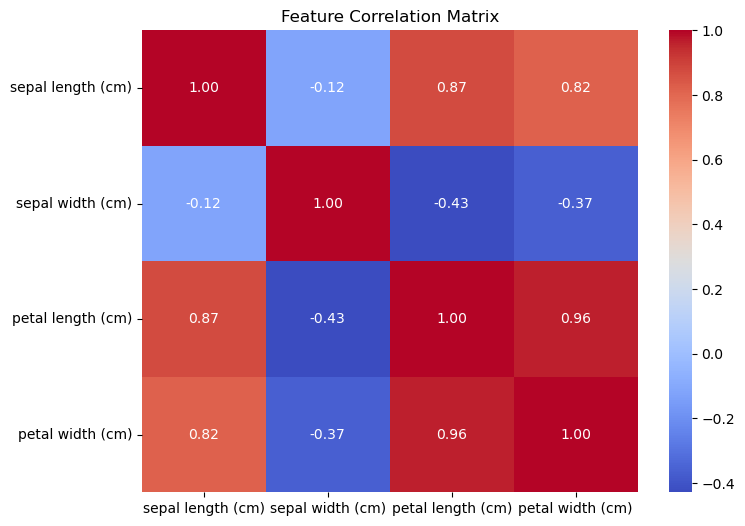

In [244]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

We can see strong positive correlations with all relationships except those that include the sepal width, these relationships have very weak negative correlations.

# Modeling the Iris

## Support Vector Machine (SVM) Model

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.drop("species", axis=1) # features
y = df["species"] # target

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize and train the SVM
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train_scaled, y_train)

# make predictions
y_pred = model.predict(X_test_scaled)

# evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



**Terminology Explaination**  
***Precision:*** out of all predictions of a certain species, how many were the correct prediction, $P$  
***Recall:*** out of all the true occurrences of a certain species, how many were predcited correctly, $R$  
***f1-score:*** harmonic mean of precision and recall $\frac{2PR}{P+R}$  
***Support:*** number of true occurrences of a certain species

**Initial SVM Stats**  
Before further tuning (C=1), the various kernels yielded varying overall accuracies:  
*linear kernel:* 91%  
*rbf kernel:* **93%**  
*poly kernel:* 87%

### Analyzing Parameter Tuning for SVM

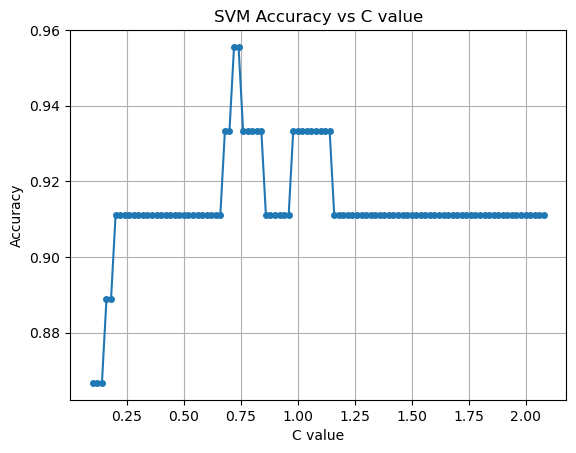

In [455]:
from sklearn.metrics import accuracy_score
vals = 0.1 + np.arange(100) / 50
acc = []

for C in vals:
    # initialize and train the SVM
    model = SVC(kernel='rbf', C=C)
    model.fit(X_train_scaled, y_train)
    
    # make predictions
    y_pred = model.predict(X_test_scaled)
    acc.append(accuracy_score(y_test, y_pred))

fig1, ax2 = plt.subplots()

ax2.plot(vals, acc,
         marker='o',
         markersize=4)

ax2.set_title("SVM Accuracy vs C value")
ax2.set_xlabel("C value")
ax2.set_ylabel("Accuracy")
ax2.grid(True)
plt.show()

In [446]:
print(f'C value: {vals[np.argmax(acc)]} , accuracy: {np.max(acc):.2f}')

C value: 0.72 , accuracy: 0.96


**SVM Graph Analysis**  
Analyzing the accuracy vs C value data, we found that **C=0.72** resulted in maximum accuracy.

In [442]:
# initialize and train with maximum accuracy C
model = SVC(kernel='rbf', C=0.72)
model.fit(X_train_scaled, y_train)

# make predictions
y_pred = model.predict(X_test_scaled)

# evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



**Support Vector Machine Results**  
After tuning the SVM with rbf kernel and C value of 0.72, we got a prediction accuracy of 96%. However, looking at the graph, we can assume this max accuracy value of C is very specific to our chosen testing and training sets, so this C value is probably not generalizable to other situations. Any C value above 0.5 seems to be a steadily good choice for a prediction accuracy of 93% for any choice of testing and training sets.  
Overall, SVM is a good model for predicted the Iris species.

## Logistic Regression (LR) Model

In [453]:
from sklearn.linear_model import LogisticRegression

# Create the model with regularization parameter C
logreg = LogisticRegression(C=1.0, max_iter=200)  # You can try other C values like 0.1 or 10

# Fit the model
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Optional: more detailed metrics
print(classification_report(y_test, y_pred, target_names=logreg.classes_))

Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



The untuned logistic regression model got an accuracy score of 91%

### Analyzing Parameter Tuning for LR

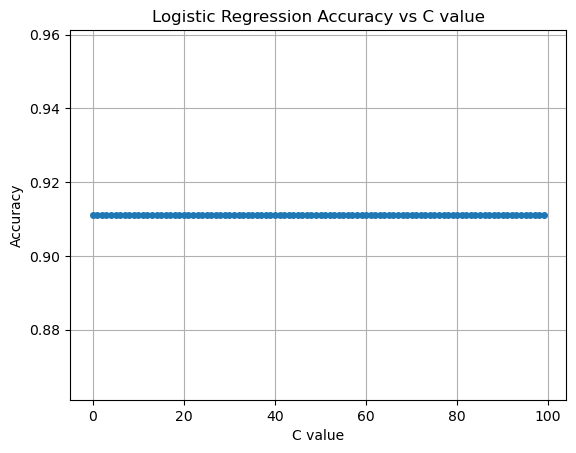

0.91


In [491]:
vals = 0.01 + np.arange(100)
acc = []

for C in vals:
    
    logreg = LogisticRegression(C=C, max_iter=200)
    logreg.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    acc.append(accuracy_score(y_test, y_pred))

fig1, ax3 = plt.subplots()

ax3.plot(vals, acc,
         marker='o',
         markersize=4)

ax3.set_title("Logistic Regression Accuracy vs C value")
ax3.set_xlabel("C value")
ax3.set_ylabel("Accuracy")
ax3.grid(True)
plt.show()

print(f'{np.max(acc):.2f}')

**Logistic Regression Results**  
The logistic regression model yielded an accuracy score of 91% and the accuracy is independent of the C value. The logistic regression model is a good fit for predicting the Iris species but it is 5% less accurate than the tuned SVM and 2% less accurate than the untuned SVM.

## Decision Tree Model

In [610]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)

# fit the model, no scaling needed
tree.fit(X_train, y_train)

# predict on test set
y_pred = tree.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# detailed report
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.98
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Visualizing the Decison Tree

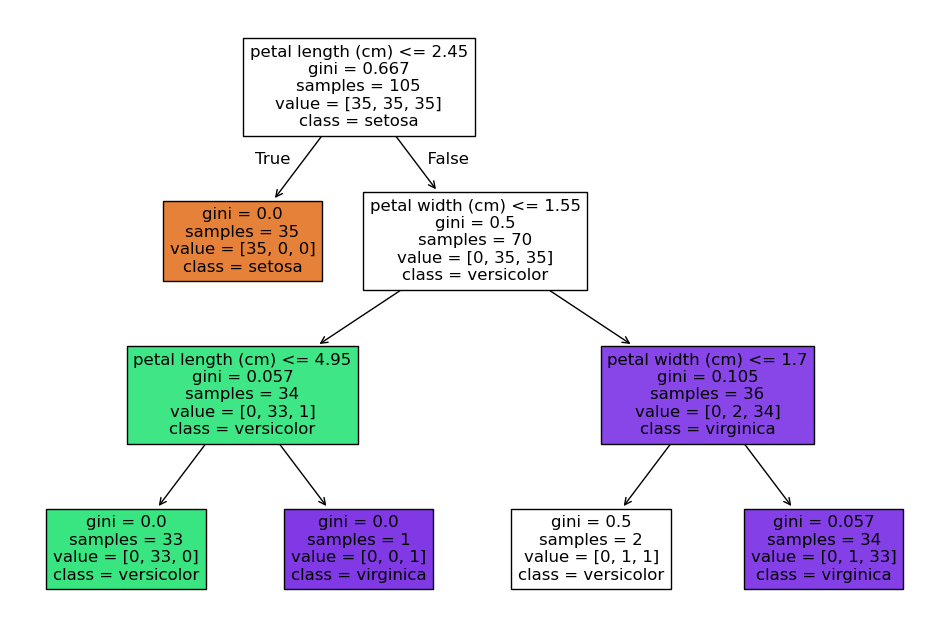

In [612]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

**Decision Tree Results**  
The decision tree model had an outstanding performance, reaching accuracy scores of 98% with max depth of 3. The other attribute, minimum samples for a split, was set to 2 but the accuracy did not change unless this value exceeded 34.The last attribute, minimum samples for a leaf node, was best at and any other value dropped the accuracy significantly. The max depth seemed to be the most important for tuning the decision tree. The Decision Tree performed better than both other models, SVM and logistic regression.

## Random  Forest Model

Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



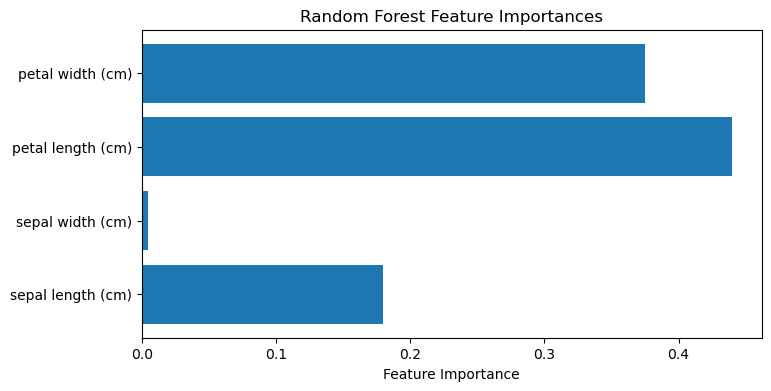

In [706]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
forest = RandomForestClassifier(n_estimators=200,
                                max_depth=1,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                bootstrap=True,
                                random_state=42)

# Fit the model, no scaling
forest.fit(X_train, y_train)

# Predict
y_pred = forest.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# plot feature importance
importances = forest.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 4))
plt.barh(np.array(features), importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

**Random Forest Results**  
After tuning the Random Forest model, it got an accuracy of 98%, tying the decision tree model's accuracy for best performance. Looking at the feature graph, we can see that the model put high importance on the petal length and width and moderate importance on the sepal length and no importance on the sepal width. This importance can be predicted from the boxplots from earlier, we see that the sepal width has extreme overlapping, sepal length has moderate overlapping, and the petal length and width have much less overlapping.

# Results
All models had very high prediction accuracy scores and therefore were all good models for the prediction of Iris species based off petal and sepal dimensions. Comparing the models side by side:   
  
**Model:**                   **Accuracy**  
*Support Vector Machine:*  96%  
*Logistic Regression:*     91%  
*Decision Tree:*           **98%**  
*Random Forest:*           **98%**  
  
We can see that the Decision Tree and Random Forest models predicted most accuractely.